In [1]:
import csv
import numpy as np
import pandas as pd
import os
from subprocess import check_output
import matplotlib
import matplotlib.pyplot as plt 
import scipy.stats as st
import seaborn as sns
from random import sample

csv_file = "City_of_Seattle_Wages_by_Department.csv"

In [2]:
infileAveWageDept = 'City_of_Seattle_Wages_by_Department.csv'
infileWageJobTitles = 'City_of_Seattle_Wages___Comparison_by_Gender__Wage_Progression_Job_Titles(AutoRecovered).csv'

In [3]:
dfAveWageDept = pd.read_csv(infileAveWageDept)
dfAveWageDept.head()

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.0,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.0,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.0,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.0,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.0,100.0,NaN


In [7]:
deptDF = dfAveWageDept.groupby(
   ['Department']
    ).agg(
        {
             'Total No. Empl':sum,    # Sum duration per group
             'No. Male Empl':sum,  # get the count of females
             'No. Female Empl':sum,  # get the count of males

        }
    )
deptDF

,Total No. Empl,No. Male Empl,No. Female Empl
Department,,,
Arts and Cultural Affairs,28,8.0,20.0
City Auditor,10,2.0,8.0
City Budget Office,27,10.0,17.0
City Employees Retirement Syst,16,4.0,12.0
City Light,1689,1169.0,520.0
Civil Service Commissions,8,5.0,3.0
Department of Planning & Dev,326,177.0,149.0
Dept of Finance & Admn Svc,501,272.0,229.0
Ethics And Elections,7,4.0,3.0


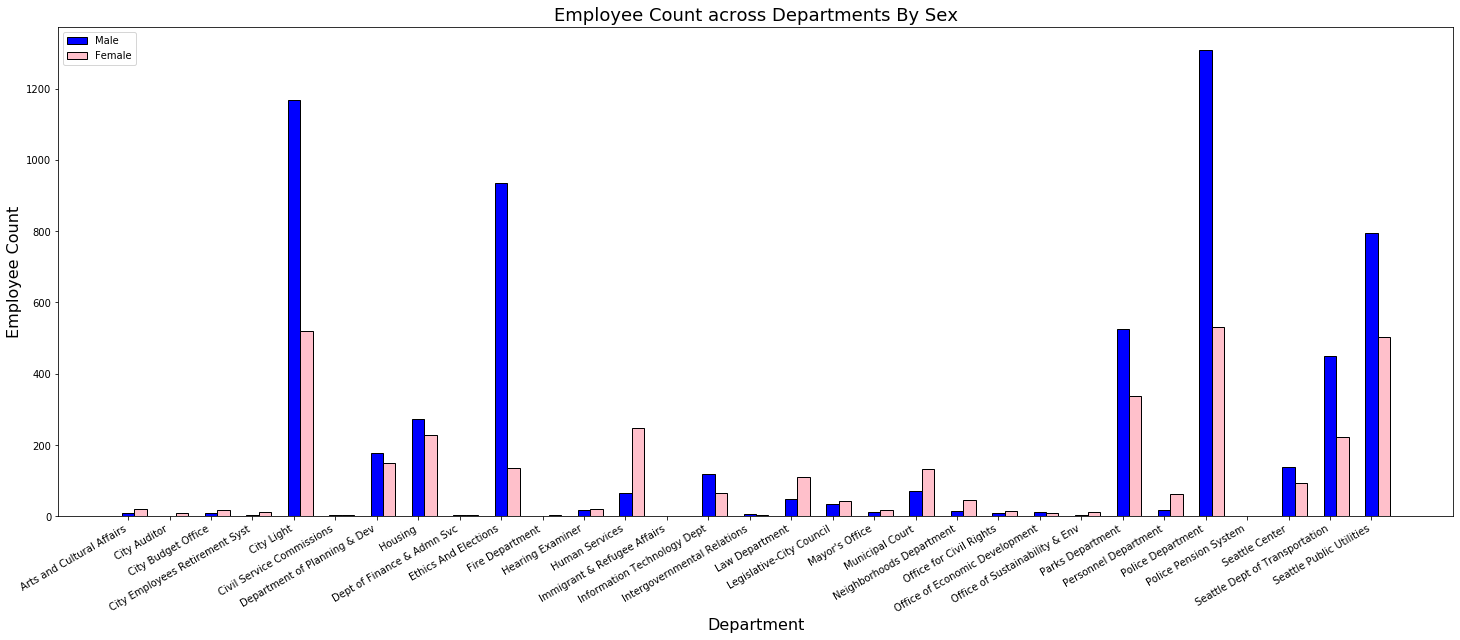

In [8]:
#What is the male to female ratio of each deptartment? - bar charts

#Get Unique Departments
labels = dfAveWageDept["Department"].unique()
#remove last entry from Labels "Nan" and create list of labels of departments
labels = np.delete(labels, len(labels) - 1)
xVals = np.arange(len(labels))
#create subplot big enough
fig,ax = plt.subplots(figsize=(25,10))
# plot bar charts
plt.bar(xVals, deptDF['No. Male Empl'], width=0.3, color='blue',edgecolor='black')
plt.bar(xVals + 0.3, deptDF['No. Female Empl'], width=0.3, color='pink',edgecolor='black')
#creat values on x axis for department labels 
plt.xticks(xVals, labels)
#create legends / titles
plt.xlabel('Department', fontsize=16)
plt.ylabel('Employee Count', fontsize=16)
plt.title('Employee Count across Departments By Sex',fontsize=18)
plt.legend(["Male","Female"],loc=2)

#format labels to avoid overlapping and being unable to read
fig.autofmt_xdate()
plt.savefig("EmployeeCount.png")
plt.show()

In [11]:
deptRateDF = dfAveWageDept.groupby(
   ['Department']
    ).agg(
        {
             'Total Avg Hrly Rate': "mean",    # Sum duration per group
             'Male Avg Hrly Rate': "mean",  # get the count of females
             'Female Avg Hrly Rate': "mean",  # get the count of males

        }
    )
deptRateDF

,Total Avg Hrly Rate,Male Avg Hrly Rate,Female Avg Hrly Rate
Department,,,
Arts and Cultural Affairs,34.830000,31.623750,36.366923
City Auditor,49.200000,56.390000,41.475000
City Budget Office,47.695714,55.170000,44.316667
City Employees Retirement Syst,39.465000,35.080000,37.761250
City Light,39.214015,40.674619,38.136923
Civil Service Commissions,29.646667,5.530000,29.646667
Department of Planning & Dev,40.883294,42.604655,40.298947
Dept of Finance & Admn Svc,36.920388,37.185647,36.281250
Ethics And Elections,46.467500,47.122500,44.870000


In [10]:
#What is the female to male % average hourly rate by department? (variance in wage) - scatterplot
dfAveWageDept.head()

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.0,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.0,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.0,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.0,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.0,100.0,NaN


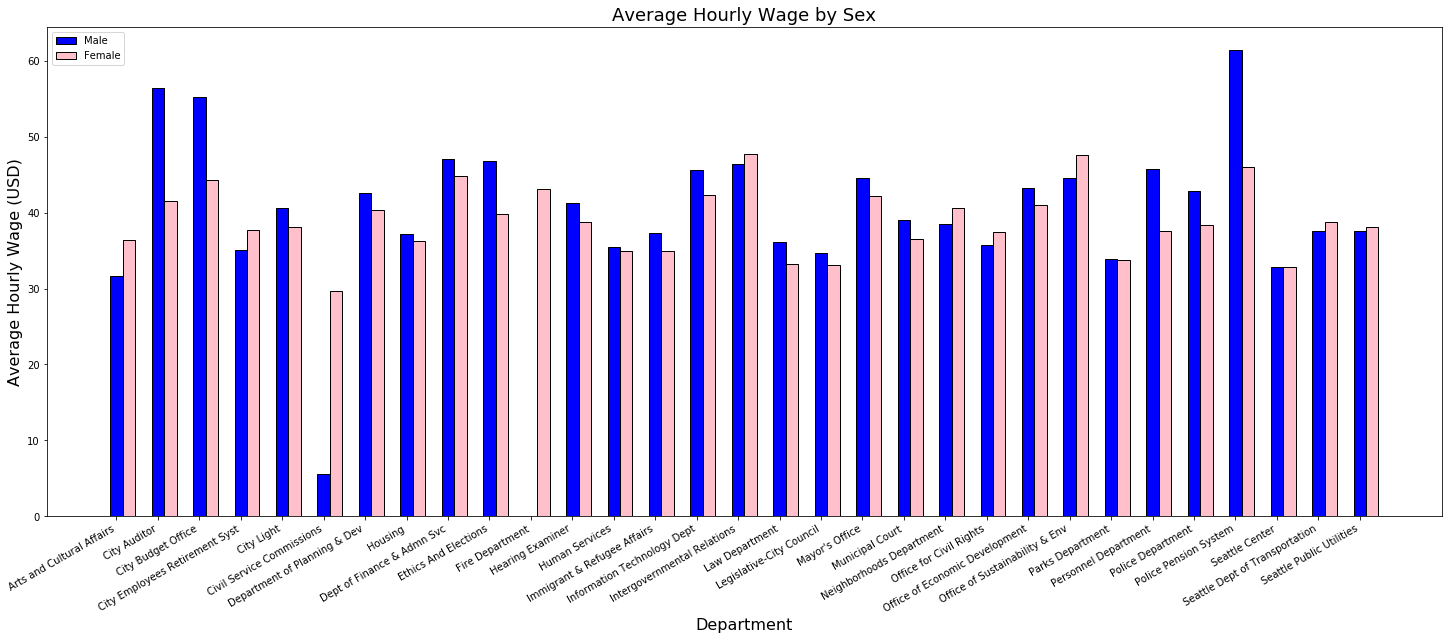

In [12]:
#Get Unique Departments
labelz = dfAveWageDept["Department"].unique()
#remove last entry from Labels "Nan" and create list of labels of departments
labelz = np.delete(labelz, len(labelz) - 1)
xValz = np.arange(len(labelz))
#create subplot big enough
fig,ax = plt.subplots(figsize=(25,10))
# plot bar charts
plt.bar(xValz, deptRateDF['Male Avg Hrly Rate'], width=0.3, color='blue',edgecolor='black')
plt.bar(xValz + 0.3, deptRateDF['Female Avg Hrly Rate'], width=0.3, color='pink',edgecolor='black')
#creat values on x axis for department labels 
plt.xticks(xValz, labelz)
#create legends / titles
plt.xlabel('Department', fontsize=16)
plt.ylabel('Average Hourly Wage (USD)', fontsize=16)
plt.title('Average Hourly Wage by Sex',fontsize=18)
plt.legend(["Male","Female"],loc=2)

#format labels to avoid overlapping and being unable to read
fig.autofmt_xdate()
plt.savefig("AveHrWage.png")
plt.show()

In [13]:
df = pd.read_csv(csv_file)
df.head()

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.0,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.0,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.0,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.0,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.0,100.0,NaN


In [14]:
df.groupby([
    'Department'
]).agg({
    'No. Female Empl': "count",  # get the count of females
     'No. Male Empl': "count",  # get the count of males
})

,No. Female Empl,No. Male Empl
Department,,
Arts and Cultural Affairs,13,8
City Auditor,2,2
City Budget Office,6,3
City Employees Retirement Syst,8,4
City Light,169,210
Civil Service Commissions,3,1
Department of Planning & Dev,57,58
Dept of Finance & Admn Svc,88,85
Ethics And Elections,1,4


In [16]:
# group departments and make into df 
chart_data_df = df.loc[(df["Department"] == "City Light") | 
                                       (df["Department"] == "Department of Planning & Dev") | 
                                       (df["Department"] == "Dept of Finance & Admn Svc") |
                                       (df["Department"] == "Seattle Dept of Transportation") |
                                       (df["Department"] == "Police Department") |
                                       (df["Department"] == "Seattle Center") |
                                       (df["Department"] == "Seattle Public Utilities"),:]

#print chart 
print(chart_data_df)
type(chart_data_df)

                    Department                    Jobtitle  \
39                  City Light                  Accountant   
40                  City Light             Accountant,Prin   
41                  City Light               Accountant,Sr   
42                  City Light                    Act Exec   
43                  City Light              Actg Tech I-BU   
...                        ...                         ...   
1641  Seattle Public Utilities       Wtrshed Resource Spec   
1642  Seattle Public Utilities      Wtrshed Resources Tech   
1643  Seattle Public Utilities  Wtrworks Maint Spec,Sr-SMU   
1644  Seattle Public Utilities     Wtrworks Maint Spec-SMU   
1645  Seattle Public Utilities         Wtrworks Maint Supv   

      Female Avg Hrly Rate  No. Female Empl  Male Avg Hrly Rate  \
39                   30.63              4.0               30.92   
40                   38.48              2.0               39.96   
41                   35.26              4.0           

pandas.core.frame.DataFrame

In [17]:
# create new df with department and male femal values added 
chartData=chart_data_df.groupby([
    'Department'
]).agg({
    'No. Female Empl': "count",  # get the count of females
     'No. Male Empl': "count",  # get the count of males
})

In [18]:
# print chart 
chartData

,No. Female Empl,No. Male Empl
Department,,
City Light,169,210
Department of Planning & Dev,57,58
Dept of Finance & Admn Svc,88,85
Police Department,82,82
Seattle Center,52,52
Seattle Dept of Transportation,85,111
Seattle Public Utilities,141,168


,No. Female Empl,No. Male Empl
Department,,
City Light,169,210
Department of Planning & Dev,57,58
Dept of Finance & Admn Svc,88,85
Police Department,82,82
Seattle Center,52,52
Seattle Dept of Transportation,85,111
Seattle Public Utilities,141,168


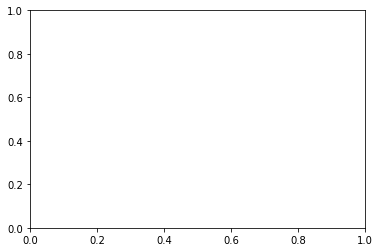

In [19]:
# set data 
af = pd.DataFrame(chartData, columns = [ 'No. Female Empl', 'No. Male Empl'])

result = plt.subplots()
#print 
af

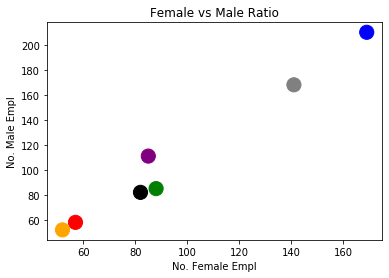

In [20]:
#create scatter plot 
#set values 
s = 200
c = ['blue', 'red', 'green', 'black', 'orange','purple','grey']
x = chartData["No. Female Empl"]
y = chartData["No. Male Empl"]
#format labels and title 
plt.title("Female vs Male Ratio")
plt.xlabel("No. Female Empl")
plt.ylabel("No. Male Empl")
plt.scatter(x, y, s, c)

In [21]:
wage_df = pd.read_csv(csv_file)
wage_df.head()

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.0,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.0,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.0,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.0,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.0,100.0,NaN


In [22]:
wage_df["No. Female Empl"].fillna(0, inplace=True)
wage_df

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,0.0,29.75,1.0,29.75,1,39.00,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.00,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.00,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.00,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.00,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1642,Seattle Public Utilities,Wtrshed Resources Tech,NaN,0.0,34.45,1.0,34.45,1,73.00,NaN,No women in title
1643,Seattle Public Utilities,"Wtrworks Maint Spec,Sr-SMU",NaN,0.0,29.99,2.0,29.99,2,43.00,NaN,No women in title
1644,Seattle Public Utilities,Wtrworks Maint Spec-SMU,NaN,0.0,27.65,3.0,27.65,3,47.00,NaN,No women in title
1645,Seattle Public Utilities,Wtrworks Maint Supv,NaN,0.0,35.57,1.0,35.57,1,14.00,NaN,No women in title


In [23]:
wage_df["No. Male Empl"].fillna(0, inplace=True)
wage_df

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,0.0,29.75,1.0,29.75,1,39.00,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,0.0,26.79,1,56.00,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,0.0,26.26,1,37.00,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,0.0,31.76,2,99.00,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.00,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1642,Seattle Public Utilities,Wtrshed Resources Tech,NaN,0.0,34.45,1.0,34.45,1,73.00,NaN,No women in title
1643,Seattle Public Utilities,"Wtrworks Maint Spec,Sr-SMU",NaN,0.0,29.99,2.0,29.99,2,43.00,NaN,No women in title
1644,Seattle Public Utilities,Wtrworks Maint Spec-SMU,NaN,0.0,27.65,3.0,27.65,3,47.00,NaN,No women in title
1645,Seattle Public Utilities,Wtrworks Maint Supv,NaN,0.0,35.57,1.0,35.57,1,14.00,NaN,No women in title


In [24]:
wage_df.drop('Notes', axis=1)


,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage
0,Arts and Cultural Affairs,Accountant,NaN,0.0,29.75,1.0,29.75,1,39.00,NaN
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,0.0,26.79,1,56.00,NaN
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,0.0,26.26,1,37.00,NaN
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,0.0,31.76,2,99.00,NaN
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.00,100.0
...,...,...,...,...,...,...,...,...,...,...
1642,Seattle Public Utilities,Wtrshed Resources Tech,NaN,0.0,34.45,1.0,34.45,1,73.00,NaN
1643,Seattle Public Utilities,"Wtrworks Maint Spec,Sr-SMU",NaN,0.0,29.99,2.0,29.99,2,43.00,NaN
1644,Seattle Public Utilities,Wtrworks Maint Spec-SMU,NaN,0.0,27.65,3.0,27.65,3,47.00,NaN
1645,Seattle Public Utilities,Wtrworks Maint Supv,NaN,0.0,35.57,1.0,35.57,1,14.00,NaN


In [25]:
wage_df.describe()


,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage
count,1112.000000,1647.000000,1148.000000,1647.000000,1647.000000,1647.000000,1647.000000,606.000000
mean,37.572914,4.343655,39.020906,7.577413,38.449174,11.921069,76.188039,100.215429
std,11.170982,88.217434,12.283102,154.590727,11.854552,242.560581,56.108034,4.631025
min,5.110000,0.000000,5.110000,0.000000,5.110000,1.000000,0.000000,74.820000
25%,29.215000,0.000000,30.280000,0.000000,29.990000,1.000000,37.960000,99.432500
50%,36.300000,1.000000,37.700000,1.000000,36.680000,2.000000,65.000000,100.000000
75%,44.740000,2.000000,45.965000,3.000000,45.300000,5.000000,102.935000,101.250000
max,86.340000,3577.000000,117.320000,6240.000000,117.320000,9817.000000,382.000000,129.890000


In [26]:
number_female = wage_df.groupby('Jobtitle')['No. Female Empl'].count()
number_female

Jobtitle
Accountant                    12
Accountant,Prin                8
Accountant,Sr                  9
Act Exec                       2
Actg Tech I                    1
                              ..
Wtrshed Resource Spec          1
Wtrshed Resources Tech         1
Wtrworks Maint Spec,Sr-SMU     1
Wtrworks Maint Spec-SMU        1
Wtrworks Maint Supv            1
Name: No. Female Empl, Length: 868, dtype: int64

In [27]:
number_male = wage_df.groupby('Jobtitle')['No. Female Empl'].count()
number_male

Jobtitle
Accountant                    12
Accountant,Prin                8
Accountant,Sr                  9
Act Exec                       2
Actg Tech I                    1
                              ..
Wtrshed Resource Spec          1
Wtrshed Resources Tech         1
Wtrworks Maint Spec,Sr-SMU     1
Wtrworks Maint Spec-SMU        1
Wtrworks Maint Supv            1
Name: No. Female Empl, Length: 868, dtype: int64

In [28]:
#dataframe_name['column_name'].interpolate(method ='linear', limit_direction ='forward')

wage_df['Male Avg Hrly Rate'].interpolate(method = 'linear', limit_direction = 'forward')

0       29.7500
1       29.2575
2       28.7650
3       28.2725
4       27.7800
         ...   
1642    34.4500
1643    29.9900
1644    27.6500
1645    35.5700
1646    39.1500
Name: Male Avg Hrly Rate, Length: 1647, dtype: float64

In [29]:
wage_df['Female Avg Hrly Rate'].interpolate(method = 'linear', limit_direction = 'backward')

0       26.790000
1       26.790000
2       26.260000
3       31.760000
4       27.780000
          ...    
1642    35.158571
1643    35.231429
1644    35.304286
1645    35.377143
1646    35.450000
Name: Female Avg Hrly Rate, Length: 1647, dtype: float64

In [30]:
wage_df


,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,0.0,29.75,1.0,29.75,1,39.00,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,0.0,26.79,1,56.00,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,0.0,26.26,1,37.00,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,0.0,31.76,2,99.00,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.00,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1642,Seattle Public Utilities,Wtrshed Resources Tech,NaN,0.0,34.45,1.0,34.45,1,73.00,NaN,No women in title
1643,Seattle Public Utilities,"Wtrworks Maint Spec,Sr-SMU",NaN,0.0,29.99,2.0,29.99,2,43.00,NaN,No women in title
1644,Seattle Public Utilities,Wtrworks Maint Spec-SMU,NaN,0.0,27.65,3.0,27.65,3,47.00,NaN,No women in title
1645,Seattle Public Utilities,Wtrworks Maint Supv,NaN,0.0,35.57,1.0,35.57,1,14.00,NaN,No women in title


In [31]:
number_employees_male = wage_df.groupby("Department").agg({"No. Male Empl":"sum"})
number_employees_male

,No. Male Empl
Department,
Arts and Cultural Affairs,8.0
City Auditor,2.0
City Budget Office,10.0
City Employees Retirement Syst,4.0
City Light,1169.0
Civil Service Commissions,5.0
Department of Planning & Dev,177.0
Dept of Finance & Admn Svc,272.0
Ethics And Elections,4.0


In [32]:
type(number_employees_male)


pandas.core.frame.DataFrame

In [34]:
number_employees_male.reset_index(inplace=True)
number_employees_male

,Department,No. Male Empl
0,Arts and Cultural Affairs,8.0
1,City Auditor,2.0
2,City Budget Office,10.0
3,City Employees Retirement Syst,4.0
4,City Light,1169.0
5,Civil Service Commissions,5.0
6,Department of Planning & Dev,177.0
7,Dept of Finance & Admn Svc,272.0
8,Ethics And Elections,4.0
9,Fire Department,936.0


In [35]:
#volume_data = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") | (combined_data["Drug Regimen"] == "Ramicane") | (combined_data["Drug Regimen"] == "Infubinol") | (combined_data["Drug Regimen"] == "Ceftamin"),:]
chart_data = number_employees_male.loc[(number_employees_male["Department"] == "City Light") | 
                                       (number_employees_male["Department"] == "Department of Planning & Dev") | 
                                       (number_employees_male["Department"] == "Dept of Finance & Admn Svc") |
                                       (number_employees_male["Department"] == "Fire Department") |
                                       (number_employees_male["Department"] == "Parks Department") |
                                       (number_employees_male["Department"] == "Police Department") |
                                       (number_employees_male["Department"] == "Seattle Dept of Transportation") |
                                       (number_employees_male["Department"] == "Seattle Public Utilities"),:]
chart_data

,Department,No. Male Empl
4,City Light,1169.0
6,Department of Planning & Dev,177.0
7,Dept of Finance & Admn Svc,272.0
9,Fire Department,936.0
24,Parks Department,526.0
26,Police Department,1308.0
29,Seattle Dept of Transportation,450.0
30,Seattle Public Utilities,796.0


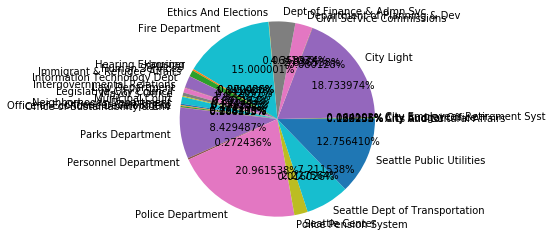

In [36]:
plt.pie(
    # using employee count
    number_employees_male['No. Male Empl'],
    # using departments for labels
    labels=number_employees_male['Department'],autopct='%20f%%'
    )
# View the plot drop above
plt.axis('equal')
plt
# View the plot
# plt.tight_layout()
plt.show()

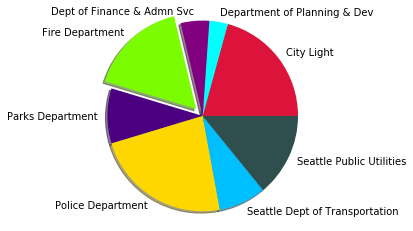

In [37]:
colors = ["crimson", "aqua", "purple", "lawngreen", "indigo", "gold", "deepskyblue", "darkslategrey"]
explode = [0,0,0,0.1,0,0,0,0]
plt.pie(
    # using employee count
    chart_data['No. Male Empl'],
    # using departments for labels
    labels=chart_data['Department'],
    colors=colors,
    explode=explode, 
    shadow = True,
    )
# View the plot drop above
plt.axis('equal')
# View the plot
# plt.tight_layout()
plt.savefig("Male_hours_pie.png")

plt.show()

In [38]:
number_employees_female = wage_df.groupby("Department").agg({"No. Female Empl":"sum"})
number_employees_female

,No. Female Empl
Department,
Arts and Cultural Affairs,20.0
City Auditor,8.0
City Budget Office,17.0
City Employees Retirement Syst,12.0
City Light,520.0
Civil Service Commissions,3.0
Department of Planning & Dev,149.0
Dept of Finance & Admn Svc,229.0
Ethics And Elections,3.0


In [39]:
number_employees_female.reset_index(inplace=True)
number_employees_female

,Department,No. Female Empl
0,Arts and Cultural Affairs,20.0
1,City Auditor,8.0
2,City Budget Office,17.0
3,City Employees Retirement Syst,12.0
4,City Light,520.0
5,Civil Service Commissions,3.0
6,Department of Planning & Dev,149.0
7,Dept of Finance & Admn Svc,229.0
8,Ethics And Elections,3.0
9,Fire Department,135.0


In [40]:
chart_data_2 = number_employees_female.loc[(number_employees_female["Department"] == "City Light") | 
                                       (number_employees_female["Department"] == "Department of Planning & Dev") | 
                                       (number_employees_female["Department"] == "Dept of Finance & Admn Svc") |
                                       (number_employees_female["Department"] == "Fire Department") |
                                       (number_employees_female["Department"] == "Parks Department") |
                                       (number_employees_female["Department"] == "Police Department") |
                                       (number_employees_female["Department"] == "Seattle Dept of Transportation") |
                                       (number_employees_female["Department"] == "Seattle Public Utilities"),:]
chart_data_2

,Department,No. Female Empl
4,City Light,520.0
6,Department of Planning & Dev,149.0
7,Dept of Finance & Admn Svc,229.0
9,Fire Department,135.0
24,Parks Department,337.0
26,Police Department,530.0
29,Seattle Dept of Transportation,223.0
30,Seattle Public Utilities,502.0


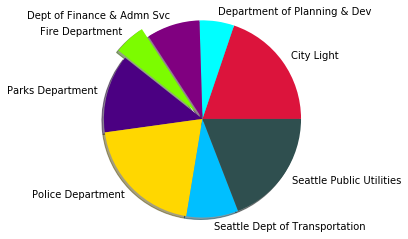

In [41]:
plt.pie(
    # using employee count
    chart_data_2['No. Female Empl'],
    # using departments for labels
    labels=chart_data_2['Department'],
      colors=colors,
    explode=explode, 
    shadow = True,
    )
    
# View the plot drop above
plt.axis('equal')
# View the plot
# plt.tight_layout()
plt.savefig("female_hours_pie.png")

plt.show()

In [42]:
wages_male = wage_df.groupby("Department").agg({"Male Avg Hrly Rate":"mean"})
wages_male

,Male Avg Hrly Rate
Department,
Arts and Cultural Affairs,31.623750
City Auditor,56.390000
City Budget Office,55.170000
City Employees Retirement Syst,35.080000
City Light,40.674619
Civil Service Commissions,5.530000
Department of Planning & Dev,42.604655
Dept of Finance & Admn Svc,37.185647
Ethics And Elections,47.122500


In [43]:
wages_male.reset_index(inplace=True)
wages_male

,Department,Male Avg Hrly Rate
0,Arts and Cultural Affairs,31.623750
1,City Auditor,56.390000
2,City Budget Office,55.170000
3,City Employees Retirement Syst,35.080000
4,City Light,40.674619
5,Civil Service Commissions,5.530000
6,Department of Planning & Dev,42.604655
7,Dept of Finance & Admn Svc,37.185647
8,Ethics And Elections,47.122500
9,Fire Department,46.825846


In [44]:
chart_data_3 = wages_male.loc[(wages_male["Department"] == "City Light") | 
                                       (wages_male["Department"] == "Department of Planning & Dev") | 
                                       (wages_male["Department"] == "Dept of Finance & Admn Svc") |
                                       (wages_male["Department"] == "Fire Department") |
                                       (wages_male["Department"] == "Parks Department") |
                                       (wages_male["Department"] == "Police Department") |
                                       (wages_male["Department"] == "Seattle Dept of Transportation") |
                                       (wages_male["Department"] == "Seattle Public Utilities"),:]
chart_data_3

,Department,Male Avg Hrly Rate
4,City Light,40.674619
6,Department of Planning & Dev,42.604655
7,Dept of Finance & Admn Svc,37.185647
9,Fire Department,46.825846
24,Parks Department,33.841450
26,Police Department,42.908537
29,Seattle Dept of Transportation,37.596577
30,Seattle Public Utilities,37.539048


In [45]:
x_axis = np.arange(len(Department))


NameError: name 'Department' is not defined

NameError: name 'tick_label' is not defined

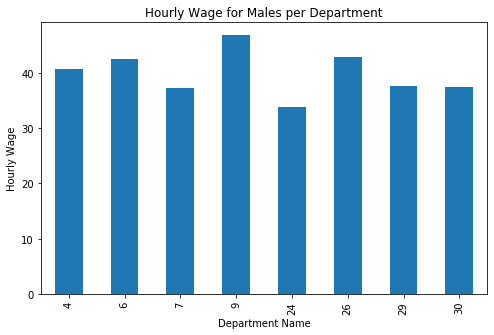

In [46]:
chart_data_3.plot(kind="bar",figsize=(8,5), legend=False)
plt.ylabel("Hourly Wage")
plt.xlabel("Department Name")
plt.title("Hourly Wage for Males per Department")
tick_label("City Light")

In [47]:
wages_female = wage_df.groupby("Department").agg({"Female Avg Hrly Rate":"mean"})
wages_female

,Female Avg Hrly Rate
Department,
Arts and Cultural Affairs,36.366923
City Auditor,41.475000
City Budget Office,44.316667
City Employees Retirement Syst,37.761250
City Light,38.136923
Civil Service Commissions,29.646667
Department of Planning & Dev,40.298947
Dept of Finance & Admn Svc,36.281250
Ethics And Elections,44.870000


In [48]:
wages_female.reset_index(inplace=True)
wages_female

,Department,Female Avg Hrly Rate
0,Arts and Cultural Affairs,36.366923
1,City Auditor,41.475000
2,City Budget Office,44.316667
3,City Employees Retirement Syst,37.761250
4,City Light,38.136923
5,Civil Service Commissions,29.646667
6,Department of Planning & Dev,40.298947
7,Dept of Finance & Admn Svc,36.281250
8,Ethics And Elections,44.870000
9,Fire Department,39.821053


In [49]:
chart_data_4 = wages_female.loc[(wages_female["Department"] == "City Light") | 
                                       (wages_female["Department"] == "Department of Planning & Dev") | 
                                       (wages_female["Department"] == "Dept of Finance & Admn Svc") |
                                       (wages_female["Department"] == "Fire Department") |
                                       (wages_female["Department"] == "Parks Department") |
                                       (wages_female["Department"] == "Police Department") |
                                       (wages_female["Department"] == "Seattle Dept of Transportation") |
                                       (wages_female["Department"] == "Seattle Public Utilities"),:]
chart_data_4

,Department,Female Avg Hrly Rate
4,City Light,38.136923
6,Department of Planning & Dev,40.298947
7,Dept of Finance & Admn Svc,36.281250
9,Fire Department,39.821053
24,Parks Department,33.734639
26,Police Department,38.421341
29,Seattle Dept of Transportation,38.796706
30,Seattle Public Utilities,38.142340


Text(0.5, 1.0, 'Hourly Wage for Males per Department')

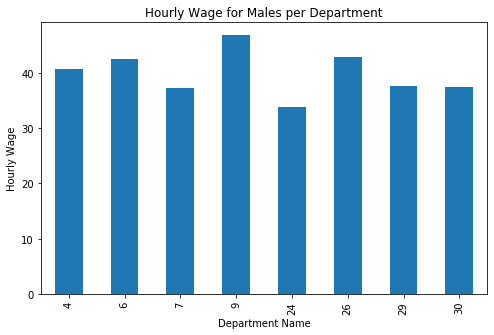

In [50]:
chart_data_3.plot(kind="bar", figsize=(8,5), legend=False)
plt.ylabel("Hourly Wage")
plt.xlabel("Department Name")
plt.title("Hourly Wage for Males per Department")

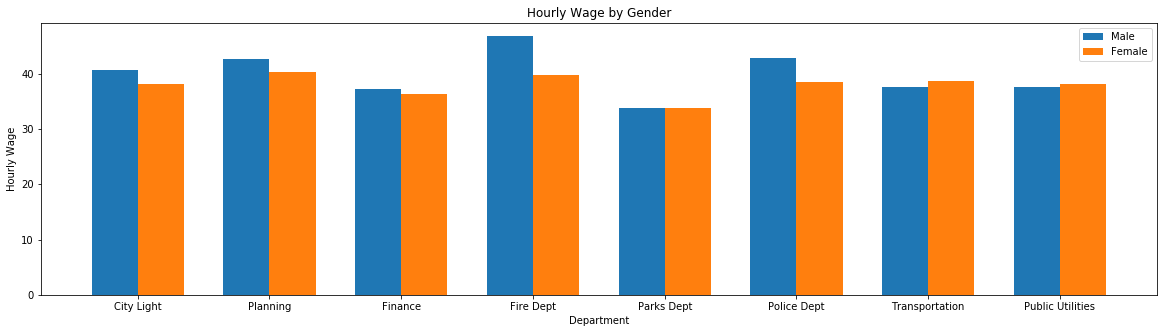

In [51]:
labels = ['City Light', 'Planning', 'Finance', 'Fire Dept', 'Parks Dept',
          'Police Dept', 'Transportation', 'Public Utilities']
male = [40.67, 42.60, 37.18, 46.82, 33.84, 42.90, 37.59, 37.53]
female = [38.13, 40.29, 36.28, 39.82, 33.73, 38.42, 38.76, 38.14]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, male, width, label='Male')
rects2 = ax.bar(x + width/2, female, width, label='Female')

ax.set_ylabel('Hourly Wage')
ax.set_xlabel('Department')
ax.set_title('Hourly Wage by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig("hourly_wage_bar")

In [52]:
new_df= number_employees_male.loc[number_employees_male['No. Male Empl'] > 100]

AttributeError: 'Text' object has no property 'box'

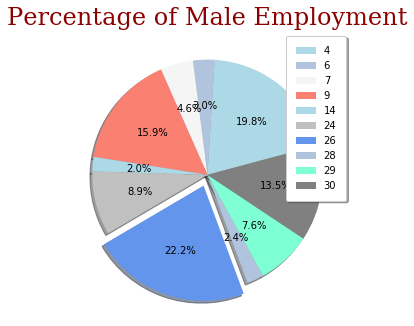

In [53]:
# Create a pie chart
fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
my_colors = ['lightblue','lightsteelblue','whitesmoke', 'salmon','lightblue','silver','cornflowerblue','lightsteelblue','aquamarine', 'grey'] #https://matplotlib.org/tutorials/colors/colors.html
textstr = f'Say\nSomething\nHere\nif you want'
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 24,
        }
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.25)
plt.pie(
    # using employee count
    new_df['No. Male Empl'],
    # using departments for labels
    labels=None,
    autopct='%1.1f%%',
    explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0,),
    startangle=15, 
    shadow = True, 
    colors=my_colors,
    center = (0,0), frame = False 
    )
ax.set_position([0.3, -0.2, 0.4, 0.4])
ax.legend(loc='best',fancybox=True, framealpha=1, shadow=True, borderpad=1, labels=new_df.index.values,)
ax.set_title('Percentage of Male Employment', fontdict=font)
# place a text box in upper left in axes coords
# ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
ax.text(0.06, 0.11, textstr, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=14, box=props)
        
# View the plot drop above
plt.axis('equal')
# View the plot
plt.tight_layout()
plt.show()

In [54]:
sea_wage_df = pd.read_csv(csv_file)
sea_wage_df.head()

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.0,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.0,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.0,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.0,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.0,100.0,NaN


In [55]:
employees_male = sea_wage_df.groupby("Department").agg({"No. Male Empl":"sum"})
employees_male

,No. Male Empl
Department,
Arts and Cultural Affairs,8.0
City Auditor,2.0
City Budget Office,10.0
City Employees Retirement Syst,4.0
City Light,1169.0
Civil Service Commissions,5.0
Department of Planning & Dev,177.0
Dept of Finance & Admn Svc,272.0
Ethics And Elections,4.0


In [56]:
hourly_wage_male = sea_wage_df.groupby("Department").agg({"Male Avg Hrly Rate":"mean"})
hourly_wage_male

,Male Avg Hrly Rate
Department,
Arts and Cultural Affairs,31.623750
City Auditor,56.390000
City Budget Office,55.170000
City Employees Retirement Syst,35.080000
City Light,40.674619
Civil Service Commissions,5.530000
Department of Planning & Dev,42.604655
Dept of Finance & Admn Svc,37.185647
Ethics And Elections,47.122500


In [57]:
number_employees_female = sea_wage_df.groupby("Department").agg({"No. Female Empl":"sum"})
number_employees_female

,No. Female Empl
Department,
Arts and Cultural Affairs,20.0
City Auditor,8.0
City Budget Office,17.0
City Employees Retirement Syst,12.0
City Light,520.0
Civil Service Commissions,3.0
Department of Planning & Dev,149.0
Dept of Finance & Admn Svc,229.0
Ethics And Elections,3.0


In [58]:
hourly_wage_female = sea_wage_df.groupby("Department").agg({"Female Avg Hrly Rate":"mean"})
hourly_wage_female

,Female Avg Hrly Rate
Department,
Arts and Cultural Affairs,36.366923
City Auditor,41.475000
City Budget Office,44.316667
City Employees Retirement Syst,37.761250
City Light,38.136923
Civil Service Commissions,29.646667
Department of Planning & Dev,40.298947
Dept of Finance & Admn Svc,36.281250
Ethics And Elections,44.870000


In [59]:
city_light_data = sea_wage_df.loc[sea_wage_df["Department"] == "City Light"]
city_light_data

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
39,City Light,Accountant,30.63,4.0,30.92,3.0,30.75,7,83.29,99.05,NaN
40,City Light,"Accountant,Prin",38.48,2.0,39.96,1.0,38.97,3,16.67,96.28,NaN
41,City Light,"Accountant,Sr",35.26,4.0,33.67,2.0,34.73,6,55.83,104.73,NaN
42,City Light,Act Exec,NaN,NaN,43.10,1.0,43.10,1,38.00,NaN,No women in title
43,City Light,Actg Tech I-BU,22.56,1.0,22.56,1.0,22.56,2,59.50,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
298,City Light,Util Hearing Ofcr,42.25,1.0,NaN,NaN,42.25,1,80.00,NaN,No men in title
299,City Light,Util Laborer,NaN,NaN,22.56,1.0,22.56,1,244.00,NaN,No women in title
300,City Light,"Warehouser,Chief",30.88,1.0,30.88,4.0,30.88,5,185.20,100.00,NaN
301,City Light,"Warehouser,Sr-BU",26.50,4.0,26.50,9.0,26.50,13,131.08,100.00,NaN


In [60]:
avg_city_light = city_light_data.mean()
avg_city_light

Female Avg Hrly Rate                                             38.136923
No. Female Empl                                                   3.076923
Male Avg Hrly Rate                                               40.674619
No. Male Empl                                                     5.566667
Total Avg Hrly Rate                                              39.214015
Total No. Empl                                                    6.397727
Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION      79.104659
Ratio of womens hourly rate to mens hourly rate - percentage    100.216404
dtype: float64

In [61]:
cl_female_avg = city_light_data.agg({"Female Avg Hrly Rate":"mean"})
cl_female_avg

Female Avg Hrly Rate    38.136923
dtype: float64

In [62]:
cl_male_avg = city_light_data.agg({"Male Avg Hrly Rate":"mean"})
cl_male_avg

Male Avg Hrly Rate    40.674619
dtype: float64

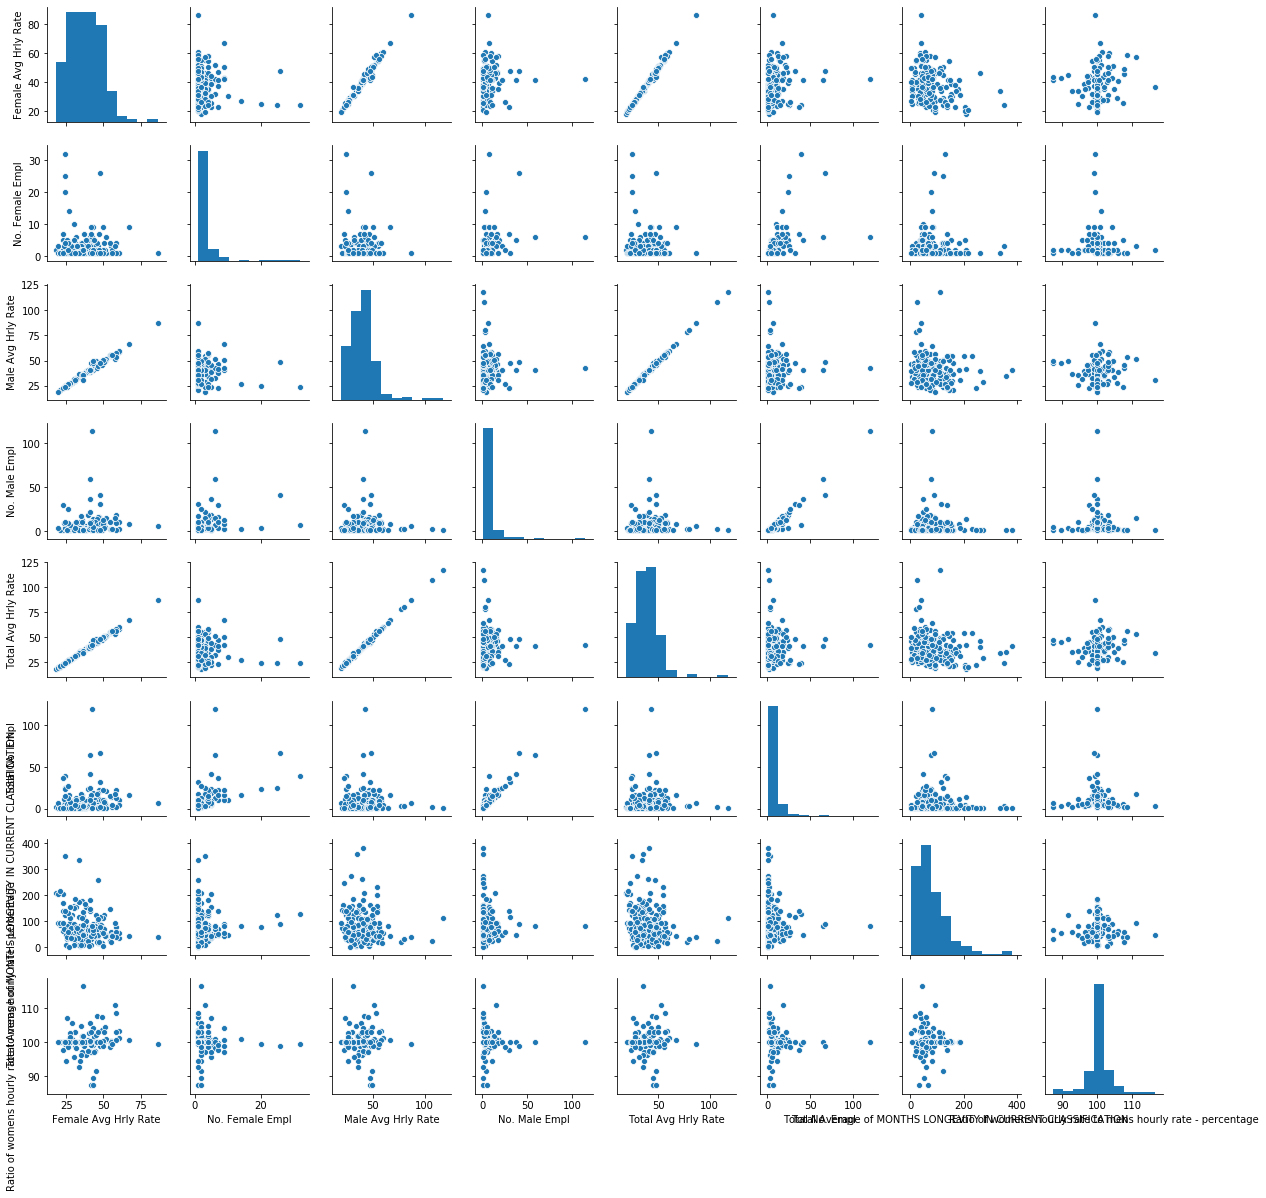

In [64]:
sns.pairplot(city_light_data)

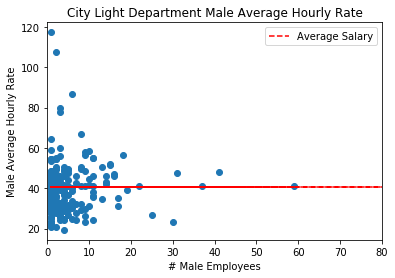

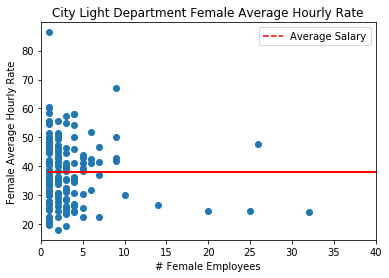

In [100]:
 y_mean = [np.mean(cl_male_avg)]*len(city_light_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(city_light_data['No. Male Empl'],city_light_data['Male Avg Hrly Rate'])
ax.set_xlim(0,80)

# Plot the average line
mean_line = ax.plot(city_light_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
plt.title('City Light Department Male Average Hourly Rate')
legend = ax.legend(loc='upper right')

 y_mean = [np.mean(cl_female_avg)]*len(city_light_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(city_light_data['No. Female Empl'],city_light_data['Female Avg Hrly Rate'])
ax.set_xlim(0,40)

# Plot the average line
mean_line = ax.plot(city_light_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
plt.xlabel('# Female Employees')
plt.ylabel('Female Average Hourly Rate')
plt.title('City Light Department Female Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('City Light Department Female vs Male Average Hourly Rate')
plt.show()

In [67]:
percent_fvm = sea_wage_df.loc[sea_wage_df["Department"] == "City Light"]
percent_fvm

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
39,City Light,Accountant,30.63,4.0,30.92,3.0,30.75,7,83.29,99.05,NaN
40,City Light,"Accountant,Prin",38.48,2.0,39.96,1.0,38.97,3,16.67,96.28,NaN
41,City Light,"Accountant,Sr",35.26,4.0,33.67,2.0,34.73,6,55.83,104.73,NaN
42,City Light,Act Exec,NaN,NaN,43.10,1.0,43.10,1,38.00,NaN,No women in title
43,City Light,Actg Tech I-BU,22.56,1.0,22.56,1.0,22.56,2,59.50,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
298,City Light,Util Hearing Ofcr,42.25,1.0,NaN,NaN,42.25,1,80.00,NaN,No men in title
299,City Light,Util Laborer,NaN,NaN,22.56,1.0,22.56,1,244.00,NaN,No women in title
300,City Light,"Warehouser,Chief",30.88,1.0,30.88,4.0,30.88,5,185.20,100.00,NaN
301,City Light,"Warehouser,Sr-BU",26.50,4.0,26.50,9.0,26.50,13,131.08,100.00,NaN


In [68]:
percent_fvm_1 = sea_wage_df.groupby("Department").agg({"Ratio of womens hourly rate to mens hourly rate - percentage":"mean"})
fig.savefig('Ratio of womens hourly rate to mens hourly rate - percentage')
percent_fvm_1

,Ratio of womens hourly rate to mens hourly rate - percentage
Department,
Arts and Cultural Affairs,99.490000
City Auditor,110.270000
City Budget Office,100.740000
City Employees Retirement Syst,99.395000
City Light,100.216404
Civil Service Commissions,100.000000
Department of Planning & Dev,100.266552
Dept of Finance & Admn Svc,99.785909
Ethics And Elections,92.760000


In [69]:
percent_fvm_avg = percent_fvm_1.mean()
percent_fvm_avg

Ratio of womens hourly rate to mens hourly rate - percentage    99.761199
dtype: float64

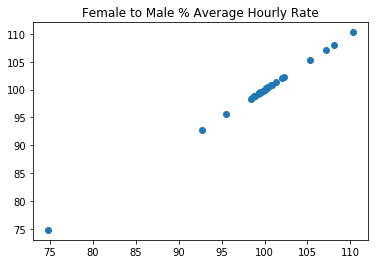

In [70]:
# Plot the data
plt.scatter(percent_fvm_1,percent_fvm_1)
ax.set_xlim(90,115)
ax.set_ylim(90,115)

plt.title('Female to Male % Average Hourly Rate')
plt.savefig('Female to Male % Average Hourly Rate')
plt.show()

,Total No. Empl
Department,
Arts and Cultural Affairs,28
City Auditor,10
City Budget Office,27
City Employees Retirement Syst,16
City Light,1689
Civil Service Commissions,8
Department of Planning & Dev,326
Dept of Finance & Admn Svc,501
Ethics And Elections,7


In [74]:
firedep_data = sea_wage_df.loc[sea_wage_df["Department"] == "Fire Department"]
firedep_data

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
525,Fire Department,"Accountant,Prin",39.96,1.0,NaN,NaN,39.96,1,70.00,NaN,No men in title
526,Fire Department,Actg Tech I-BU,22.56,2.0,NaN,NaN,22.56,2,114.00,NaN,No men in title
527,Fire Department,Actg Tech II-BU,24.35,4.0,NaN,NaN,24.35,4,112.25,NaN,No men in title
528,Fire Department,Actg Tech III-BU,26.79,1.0,NaN,NaN,26.79,1,39.00,NaN,No men in title
529,Fire Department,Admin Spec I-BU,22.56,7.0,NaN,NaN,22.56,7,95.00,NaN,No men in title
...,...,...,...,...,...,...,...,...,...,...,...
604,Fire Department,"StratAdvsr2,General Govt",38.60,1.0,51.37,1.0,44.99,2,49.00,75.15,NaN
605,Fire Department,"StratAdvsr3,General Govt",NaN,NaN,52.95,1.0,52.95,1,27.00,NaN,No women in title
606,Fire Department,"Trng&Ed Coord,Asst",26.79,1.0,NaN,NaN,26.79,1,45.00,NaN,No men in title
607,Fire Department,"Trng&Ed Coord,Asst-BU",26.79,1.0,NaN,NaN,26.79,1,119.00,NaN,No men in title


In [75]:
avg_firedep = firedep_data.mean()
avg_firedep

Female Avg Hrly Rate                                            39.821053
No. Female Empl                                                  3.552632
Male Avg Hrly Rate                                              46.825846
No. Male Empl                                                   14.400000
Total Avg Hrly Rate                                             44.661667
Total No. Empl                                                  12.750000
Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION     54.150476
Ratio of womens hourly rate to mens hourly rate - percentage    99.457778
dtype: float64

In [76]:
fd_female_avg = firedep_data.agg({"Female Avg Hrly Rate":"mean"})
fd_female_avg

Female Avg Hrly Rate    39.821053
dtype: float64

In [77]:
fd_male_avg = firedep_data.agg({"Male Avg Hrly Rate":"mean"})
fd_male_avg

Male Avg Hrly Rate    46.825846
dtype: float64

The average salary of men that work in the Fire Department is [46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.825846153846136, 46.82584615384613

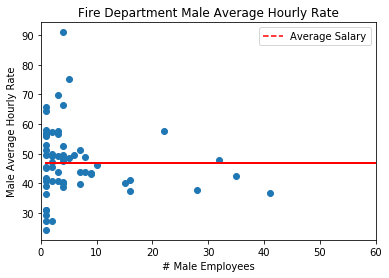

In [101]:
 y_mean = [np.mean(fd_male_avg)]*len(firedep_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(firedep_data['No. Male Empl'],firedep_data['Male Avg Hrly Rate'])
ax.set_xlim(0,60)

# Plot the average line
mean_line = ax.plot(firedep_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of men that work in the Fire Department is {y_mean}")
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
plt.title('Fire Department Male Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('Fire Department Male Average Hourly Rate')
plt.show()

The average salary of woman that work in the Fire Department is [39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.82105263157896, 39.8

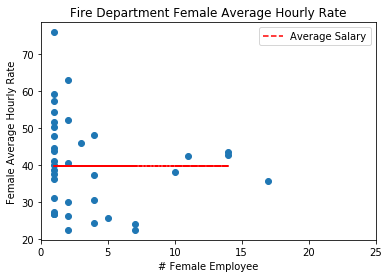

In [102]:
 y_mean = [np.mean(fd_female_avg)]*len(firedep_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(firedep_data['No. Female Empl'],firedep_data['Female Avg Hrly Rate'])
ax.set_xlim(0,25)

# Plot the average line
mean_line = ax.plot(firedep_data['No. Female Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of woman that work in the Fire Department is {y_mean}")
plt.xlabel('# Female Employee')
plt.ylabel('Female Average Hourly Rate')
plt.title('Fire Department Female Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('Fire Department Female Average Hourly Rate')
plt.show()

In [80]:
deptfinadmin_data = sea_wage_df.loc[sea_wage_df["Department"] == "Dept of Finance & Admn Svc"]
deptfinadmin_data

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of womens hourly rate to mens hourly rate - percentage,Notes
392,Dept of Finance & Admn Svc,Accountant,30.92,5.0,NaN,NaN,30.92,5,103.40,NaN,No men in title
393,Dept of Finance & Admn Svc,"Accountant,Prin",38.73,7.0,36.99,1.0,38.51,8,56.50,104.70,NaN
394,Dept of Finance & Admn Svc,"Accountant,Sr",33.82,5.0,35.57,1.0,34.11,6,45.67,95.08,NaN
395,Dept of Finance & Admn Svc,Actg Tech I-BU,22.56,2.0,NaN,NaN,22.56,2,92.50,NaN,No men in title
396,Dept of Finance & Admn Svc,Actg Tech II,24.35,3.0,24.35,1.0,24.35,4,158.00,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
516,Dept of Finance & Admn Svc,Treasury Cashier,31.51,3.0,28.88,2.0,30.46,5,62.00,109.11,NaN
517,Dept of Finance & Admn Svc,"Treasury Cashier,Sr",34.94,1.0,NaN,NaN,34.94,1,182.00,NaN,No men in title
518,Dept of Finance & Admn Svc,"Warehouser,Chief",NaN,NaN,30.88,1.0,30.88,1,172.00,NaN,No women in title
519,Dept of Finance & Admn Svc,"Warehouser,Sr-BU",26.50,5.0,26.50,3.0,26.50,8,164.25,100.00,NaN


In [81]:
avg_deptfinadmin = deptfinadmin_data.mean()
avg_deptfinadmin

Female Avg Hrly Rate                                            36.281250
No. Female Empl                                                  2.602273
Male Avg Hrly Rate                                              37.185647
No. Male Empl                                                    3.200000
Total Avg Hrly Rate                                             36.920388
Total No. Empl                                                   3.883721
Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION     83.404341
Ratio of womens hourly rate to mens hourly rate - percentage    99.785909
dtype: float64

In [82]:
deptfinadmin_female_avg = deptfinadmin_data.agg({"Female Avg Hrly Rate":"mean"})
deptfinadmin_female_avg

Female Avg Hrly Rate    36.28125
dtype: float64

In [83]:
deptfinadmin_male_avg = deptfinadmin_data.agg({"Male Avg Hrly Rate":"mean"})
deptfinadmin_male_avg

Male Avg Hrly Rate    37.185647
dtype: float64

The average salary of men that work in the Dept of Finance & Admn Svc is [37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185647058823534, 37.185

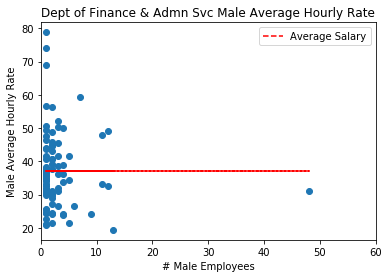

In [85]:
 y_mean = [np.mean(deptfinadmin_male_avg)]*len(deptfinadmin_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(deptfinadmin_data['No. Male Empl'],deptfinadmin_data['Male Avg Hrly Rate'])
ax.set_xlim(0,60)

# Plot the average line
mean_line = ax.plot(deptfinadmin_data['No. Male Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of men that work in the Dept of Finance & Admn Svc is {y_mean}")
plt.xlabel('# Male Employees')
plt.ylabel('Male Average Hourly Rate')
plt.title('Dept of Finance & Admn Svc Male Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('Dept of Finance & Admn Svct Male Average Hourly Rate')
plt.show()

The average salary of woman that work in the Dept of Finance & Admn Svc is [36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.28125, 36.2

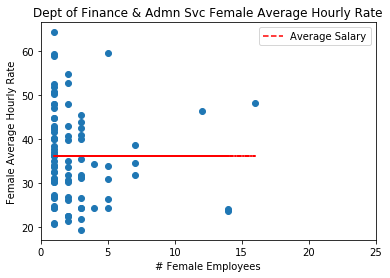

In [86]:
 y_mean = [np.mean(deptfinadmin_female_avg)]*len(deptfinadmin_data)

fig,ax = plt.subplots()

# Plot the data
plt.scatter(deptfinadmin_data['No. Female Empl'],deptfinadmin_data['Female Avg Hrly Rate'])
ax.set_xlim(0,25)

# Plot the average line
mean_line = ax.plot(deptfinadmin_data['No. Female Empl'],y_mean, label='Average Salary', linestyle='--', color='red')
print(f"The average salary of woman that work in the Dept of Finance & Admn Svc is {y_mean}")
plt.xlabel('# Female Employees')
plt.ylabel('Female Average Hourly Rate')
plt.title('Dept of Finance & Admn Svc Female Average Hourly Rate')
legend = ax.legend(loc='upper right')
plt.savefig('Dept of Finance & Admn Svc Female Average Hourly Rate')
plt.show()